## Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data_dir='/content/drive/MyDrive/Dataset/Training'

In [3]:
data_dir

'/content/drive/MyDrive/Dataset/Training'

## Import Libraries

In [4]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
from torchvision import transforms,datasets

In [6]:
from torch.utils.data import DataLoader

In [7]:
from torchvision.io import read_image

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [9]:
import os

dataset_path = "/content/drive/MyDrive/Dataset/Training"  # Adjust if necessary

if os.path.exists(dataset_path):
    print("✅ Directory exists!")
    print("Contents:", os.listdir(dataset_path))  # List its contents
else:
    print("❌ Directory does NOT exist. Check the path!")


✅ Directory exists!
Contents: ['pituitary_tumor', 'meningioma_tumor', 'no_tumor', 'glioma_tumor']


## Load the image folders to dataset

In [10]:
labels=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

In [11]:
transform = transforms.Compose([
    transforms.Resize((512)),
    transforms.CenterCrop(512),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [12]:
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

In [13]:
dataset

Dataset ImageFolder
    Number of datapoints: 2870
    Root location: /content/drive/MyDrive/Dataset/Training
    StandardTransform
Transform: Compose(
               Resize(size=512, interpolation=bilinear, max_size=None, antialias=True)
               CenterCrop(size=(512, 512))
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )

In [14]:
test_dataset=datasets.ImageFolder(root='/content/drive/MyDrive/Dataset/Testing', transform=transform)
test_dataset

Dataset ImageFolder
    Number of datapoints: 394
    Root location: /content/drive/MyDrive/Dataset/Testing
    StandardTransform
Transform: Compose(
               Resize(size=512, interpolation=bilinear, max_size=None, antialias=True)
               CenterCrop(size=(512, 512))
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )

## Visualize the image

torch.Size([3, 512, 512])


Text(0.5, 1.0, 'Gliomma Tumor')

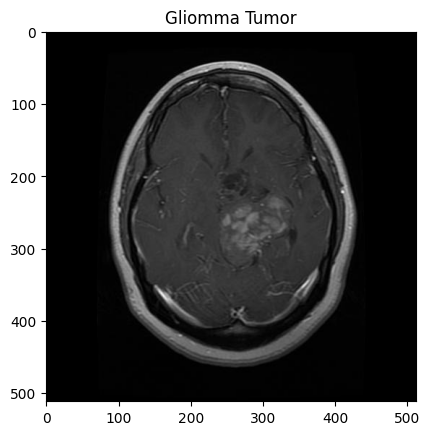

In [15]:

print(read_image('/content/drive/MyDrive/Dataset/Training/glioma_tumor/gg (1).jpg').shape)
plt.imshow(read_image('/content/drive/MyDrive/Dataset/Training/glioma_tumor/gg (1).jpg').permute(1,2,0))
plt.title("Gliomma Tumor")

torch.Size([3, 512, 512])


Text(0.5, 1.0, 'Meningioma Tumor')

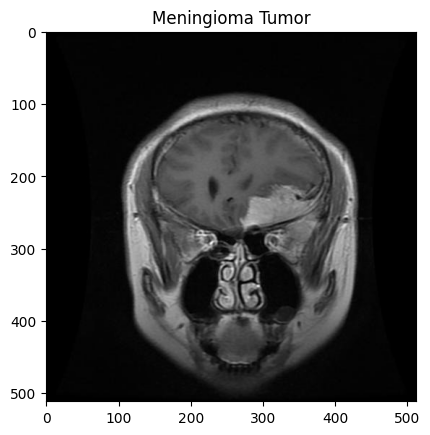

In [16]:
print(read_image('/content/drive/MyDrive/Dataset/Training/meningioma_tumor/m (10).jpg').shape)
plt.imshow(read_image('/content/drive/MyDrive/Dataset/Training/meningioma_tumor/m (10).jpg').permute(1,2,0))
plt.title("Meningioma Tumor")

torch.Size([3, 350, 350])


Text(0.5, 1.0, 'No Tumor')

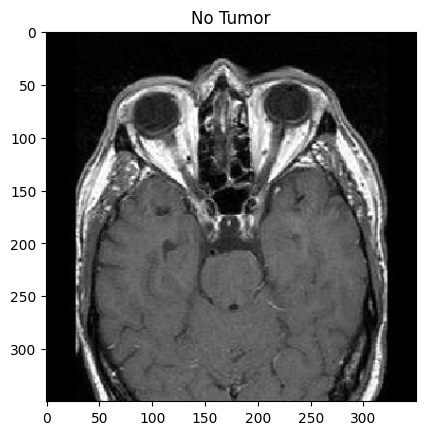

In [17]:
print(read_image('/content/drive/MyDrive/Dataset/Training/no_tumor/1.jpg').shape)
plt.imshow(read_image('/content/drive/MyDrive/Dataset/Training/no_tumor/1.jpg').permute(1,2,0))
plt.title("No Tumor")

torch.Size([3, 512, 512])


Text(0.5, 1.0, 'Pituitary Tumor')

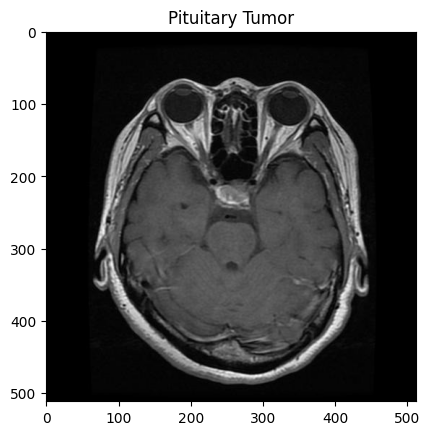

In [18]:
print(read_image('/content/drive/MyDrive/Dataset/Training/pituitary_tumor/p (1).jpg').shape)
plt.imshow(read_image('/content/drive/MyDrive/Dataset/Training/pituitary_tumor/p (1).jpg').permute(1,2,0))
plt.title("Pituitary Tumor")

Text(0.5, 1.0, 'Pituitary Tumor')

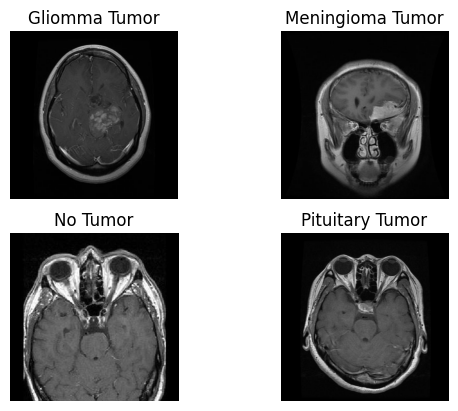

In [19]:
plt.subplot(2,2,1)
plt.imshow(read_image('/content/drive/MyDrive/Dataset/Training/glioma_tumor/gg (1).jpg').permute(1,2,0))
plt.axis('off')
plt.title("Gliomma Tumor")

plt.subplot(2,2,2)
plt.imshow(read_image('/content/drive/MyDrive/Dataset/Training/meningioma_tumor/m (10).jpg').permute(1,2,0))
plt.axis('off')
plt.title("Meningioma Tumor")

plt.subplot(2,2,3)
plt.imshow(read_image('/content/drive/MyDrive/Dataset/Training/no_tumor/1.jpg').permute(1,2,0))
plt.axis('off')
plt.title("No Tumor")

plt.subplot(2,2,4)
plt.imshow(read_image('/content/drive/MyDrive/Dataset/Training/pituitary_tumor/p (1).jpg').permute(1,2,0))
plt.axis('off')
plt.title("Pituitary Tumor")

## Passing the Dataset to DataLoader


In [20]:
train_dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=4,pin_memory=True)
test_dataloader=DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=4,pin_memory=True)

In [21]:
# Get one batch of images
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

# Print batch shape
print("Image batch shape:", images.shape)  # Expected: (batch_size, channels, height, width)
print("Label batch shape:", labels.shape)  # Expected: (batch_size,)
print("Classes:", dataset.classes)  # Class names


Image batch shape: torch.Size([1, 3, 512, 512])
Label batch shape: torch.Size([1])
Classes: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


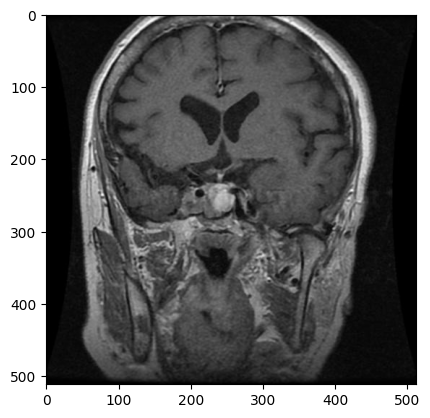

Label: pituitary_tumor


In [22]:
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Show first image in the batch
imshow(images[0])
print("Label:", dataset.classes[labels[0].item()])

In [23]:
images.shape

torch.Size([1, 3, 512, 512])

## Defining the CNN Model


Image size is 3x512x512

In [24]:
class CNN_Model(nn.Module):

  def __init__(self):
    super().__init__()
      #Convolution Filter
    self.conv1=nn.Conv2d(in_channels=3,out_channels=96,kernel_size=11,stride=4)
    self.conv2=nn.Conv2d(in_channels=96,out_channels=256,kernel_size=5,stride=1)
    self.conv3=nn.Conv2d(in_channels=256,out_channels=384,kernel_size=3,stride=1)
    self.conv4=nn.Conv2d(in_channels=384,out_channels=384,kernel_size=3,stride=1)
    self.conv5=nn.Conv2d(in_channels=384,out_channels=256,kernel_size=3,stride=1)
    # Max Pooling Filter
    self.maxpool1=nn.MaxPool2d(kernel_size=3,stride=2)

    #Fully Connected Layer -
    self.fc1=nn.Linear(in_features=10*10*256,out_features=9216)
    self.fc2=nn.Linear(in_features=9216,out_features=4096)
    self.fc3=nn.Linear(in_features=4096,out_features=4096)
    self.fc4=nn.Linear(in_features=4096,out_features=1000)
    self.fc5=nn.Linear(in_features=1000,out_features=4)


  def forward(self,X):
    # Conv & Max Pool
    X=F.relu(self.conv1(X))
    X=self.maxpool1(X)
    # Conv & Max Pool
    X=F.relu(self.conv2(X))
    X=self.maxpool1(X)
    # 2 Conv Filter followed by Max Pooll
    X=F.relu(self.conv3(X))
    X=F.relu(self.conv4(X))
    X=F.relu(self.conv5(X))
    X=self.maxpool1(X)

    # Flatten
    X=X.view(-1,10*10*256)

    # Fully Connected Layer
    X=F.relu(self.fc1(X))
    X=F.relu(self.fc2(X))
    X=F.relu(self.fc3(X))
    X=F.relu(self.fc4(X))
    X=self.fc5(X)

    return F.log_softmax(X,dim=1)

In [25]:
model=CNN_Model()
model = model.to(device)

In [26]:
# Loss and Optimizer instantiation
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

# Training Model

# **Adam Optimizer**

## Batch Size = 1

In [27]:
import time
start_time=time.time()

epochs=20
train_losses=[]
test_losses=[]
train_correct=[]
test_correct=[]

# for loop epochs
for i in range(epochs):
  trn_corr=0
  tst_corr=0


# train
  for b,(X_Train,y_train) in enumerate(train_dataloader):
    X_Train, y_train = X_Train.to(device), y_train.to(device)
    b+=1
    y_pred=model(X_Train)
    loss=criterion(y_pred,y_train)

    predicted=torch.max(y_pred.data,1)[1]
    batch_corr=(predicted==y_train).sum()
    trn_corr+=batch_corr
#update parameters

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_losses.append(loss)
  train_correct.append(trn_corr)
  print(f"Epoch: {i+1}  Loss:{loss.item()}")
# Test

  with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)
      y_val=model(X_test)
      predicted=torch.max(y_val.data,1)[1]
      tst_corr+=(predicted==y_test).sum()
  loss=criterion(y_val,y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)


current_time=time.time()
total=current_time-start_time
print(f"Total time taken to finish the training ={round(total/60,2)}mins")

Epoch: 1  Loss:1.1956406831741333
Epoch: 2  Loss:1.2547608613967896
Epoch: 3  Loss:1.069490909576416
Epoch: 4  Loss:1.2700144052505493
Epoch: 5  Loss:1.0999587774276733
Epoch: 6  Loss:1.3138706684112549
Epoch: 7  Loss:1.3338427543640137
Epoch: 8  Loss:1.3737319707870483
Epoch: 9  Loss:1.357679843902588
Epoch: 10  Loss:1.197213053703308
Epoch: 11  Loss:1.3025134801864624
Epoch: 12  Loss:1.2058426141738892
Epoch: 13  Loss:1.1373940706253052
Epoch: 14  Loss:1.8744850158691406
Epoch: 15  Loss:1.1346923112869263
Epoch: 16  Loss:1.3406400680541992
Epoch: 17  Loss:1.3901301622390747
Epoch: 18  Loss:1.3240444660186768
Epoch: 19  Loss:1.2121219635009766
Epoch: 20  Loss:1.3389842510223389
Total time taken to finish the training =22.19mins


## Batch Size = 32

In [28]:
train_dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=2,pin_memory=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2,pin_memory=True)


In [29]:
import time
start_time=time.time()

del model
model=CNN_Model()
model = model.to(device)

epochs=20
train_losses_32=[]
test_losses_32=[]
train_correct_32=[]
test_correct_32=[]

# for loop epochs
for i in range(epochs):
  trn_corr=0
  tst_corr=0


# train
  for b,(X_Train,y_train) in enumerate(train_dataloader):
    X_Train, y_train = X_Train.to(device), y_train.to(device)

    y_pred=model(X_Train)
    loss=criterion(y_pred,y_train)

    predicted=torch.max(y_pred.data,1)[1]
    batch_corr=(predicted==y_train).sum()
    trn_corr+=batch_corr
#update parameters

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f"Epoch: {i+1}  Loss:{loss.item()}")
  train_losses_32.append(loss)
  train_correct_32.append(trn_corr)

# Test

  with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)
      y_val=model(X_test)
      predicted=torch.max(y_val.data,1)[1]
      tst_corr+=(predicted==y_test).sum()
  loss=criterion(y_val,y_test)
  test_losses_32.append(loss)
  test_correct_32.append(tst_corr)


current_time=time.time()
total=current_time-start_time
print(f"Total time taken to finish the training ={round(total/60,2)}mins")

Epoch: 1  Loss:1.3854804039001465
Epoch: 2  Loss:1.388029932975769
Epoch: 3  Loss:1.3871009349822998
Epoch: 4  Loss:1.388537883758545
Epoch: 5  Loss:1.3879624605178833
Epoch: 6  Loss:1.3854082822799683
Epoch: 7  Loss:1.3867510557174683
Epoch: 8  Loss:1.3841118812561035
Epoch: 9  Loss:1.387330174446106
Epoch: 10  Loss:1.389814853668213
Epoch: 11  Loss:1.3861830234527588
Epoch: 12  Loss:1.3872504234313965
Epoch: 13  Loss:1.3873955011367798
Epoch: 14  Loss:1.3881232738494873
Epoch: 15  Loss:1.3872531652450562
Epoch: 16  Loss:1.3873353004455566
Epoch: 17  Loss:1.3866935968399048
Epoch: 18  Loss:1.3874040842056274
Epoch: 19  Loss:1.3866140842437744
Epoch: 20  Loss:1.38796067237854
Total time taken to finish the training =6.97mins


## Batch Size = 64

In [30]:
train_dataloader = DataLoader(dataset, batch_size=64, shuffle=True, num_workers=2,pin_memory=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2,pin_memory=True)

In [31]:
start_time=time.time()

del model
model=CNN_Model()
model = model.to(device)

epochs=20
train_losses_64=[]
test_losses_64=[]
train_correct_64=[]
test_correct_64=[]

# for loop epochs
for i in range(epochs):
  trn_corr=0
  tst_corr=0


# train
  for b,(X_Train,y_train) in enumerate(train_dataloader):
    X_Train, y_train = X_Train.to(device), y_train.to(device)

    y_pred=model(X_Train)
    loss=criterion(y_pred,y_train)

    predicted=torch.max(y_pred.data,1)[1]
    batch_corr=(predicted==y_train).sum()
    trn_corr+=batch_corr
#update parameters

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f"Epoch: {i+1}  Loss:{loss.item()}")
  train_losses_64.append(loss)
  train_correct_64.append(trn_corr)

# Test

  with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)
      y_val=model(X_test)
      predicted=torch.max(y_val.data,1)[1]
      tst_corr+=(predicted==y_test).sum()
  loss=criterion(y_val,y_test)
  test_losses_64.append(loss)
  test_correct_64.append(tst_corr)


current_time=time.time()
total=current_time-start_time
print(f"Total time taken to finish the training ={round(total/60,2)}mins")

Epoch: 1  Loss:1.3887701034545898
Epoch: 2  Loss:1.386656641960144
Epoch: 3  Loss:1.3894121646881104
Epoch: 4  Loss:1.3938066959381104
Epoch: 5  Loss:1.388936161994934
Epoch: 6  Loss:1.3901582956314087
Epoch: 7  Loss:1.3895585536956787
Epoch: 8  Loss:1.38898766040802
Epoch: 9  Loss:1.387568473815918
Epoch: 10  Loss:1.393253207206726
Epoch: 11  Loss:1.3881680965423584
Epoch: 12  Loss:1.3893179893493652
Epoch: 13  Loss:1.3887959718704224
Epoch: 14  Loss:1.3894833326339722
Epoch: 15  Loss:1.3917604684829712
Epoch: 16  Loss:1.3878216743469238
Epoch: 17  Loss:1.3905314207077026
Epoch: 18  Loss:1.3866910934448242
Epoch: 19  Loss:1.3897364139556885
Epoch: 20  Loss:1.3889312744140625
Total time taken to finish the training =6.87mins


# Visualization


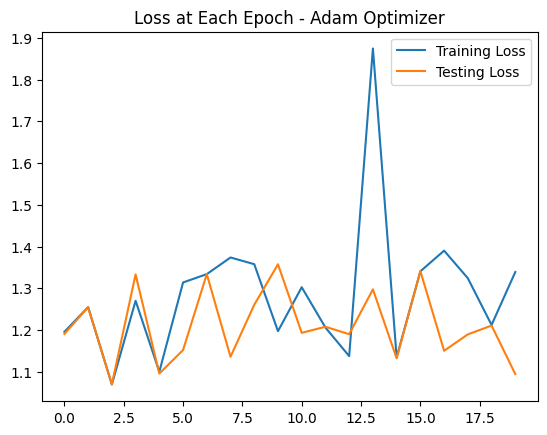

<Figure size 640x480 with 0 Axes>

In [32]:
train_losses_cpu = [loss.cpu().detach().numpy() for loss in train_losses]
test_losses_cpu = [loss.cpu().detach().numpy() for loss in test_losses]

plt.figure(figsize=(10, 10))
plt.plot(train_losses_cpu, label="Training Loss")
plt.plot(test_losses_cpu, label="Testing Loss")
plt.title("Loss at Each Epoch - Adam Optimizer")
plt.legend()
plt.savefig("/content/drive/MyDrive/Dataset/Loss Batch 1 Adam.png")
plt.show()


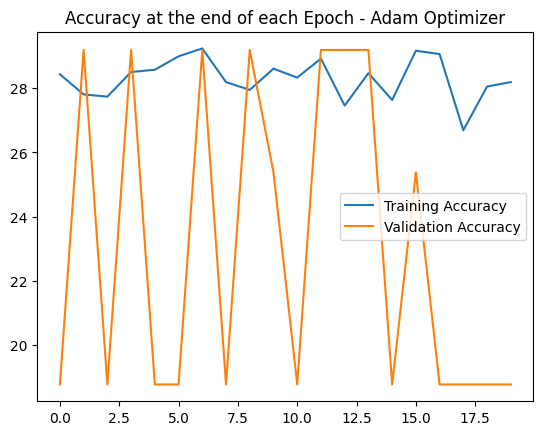

In [34]:
train_correct_cpu = [loss.cpu().detach().numpy() for loss in train_correct]
test_correct_cpu = [loss.cpu().detach().numpy() for loss in test_correct]

plt.figure(figsize=(10, 10))
plt.plot([(t/len(dataset))*100 for t in train_correct_cpu],label="Training Accuracy")
plt.plot([(t/len(test_dataset))*100 for t in test_correct_cpu],label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch - Adam Optimizer")
plt.legend()
plt.savefig("/content/drive/MyDrive/Dataset/Accuracy Batch 1 Adam.png")
plt.show()

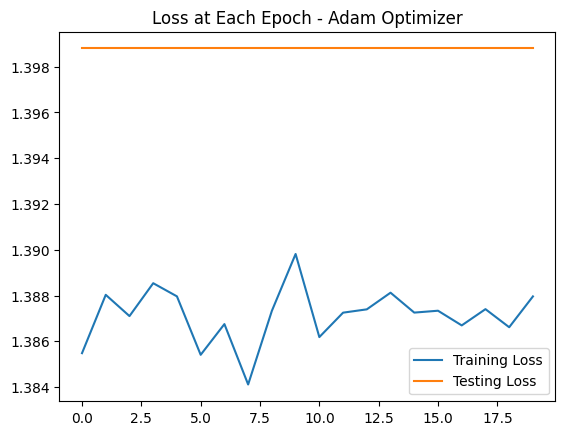

<Figure size 640x480 with 0 Axes>

In [35]:
train_losses_cpu_32 = [loss.cpu().detach().numpy() for loss in train_losses_32]
test_losses_cpu_32 = [loss.cpu().detach().numpy() for loss in test_losses_32]

plt.figure(figsize=(10, 10))
plt.plot(train_losses_cpu_32, label="Training Loss")
plt.plot(test_losses_cpu_32, label="Testing Loss")
plt.title("Loss at Each Epoch - Adam Optimizer")
plt.legend()
plt.savefig("/content/drive/MyDrive/Dataset/Loss Batch 32 Adam.png")
plt.show()



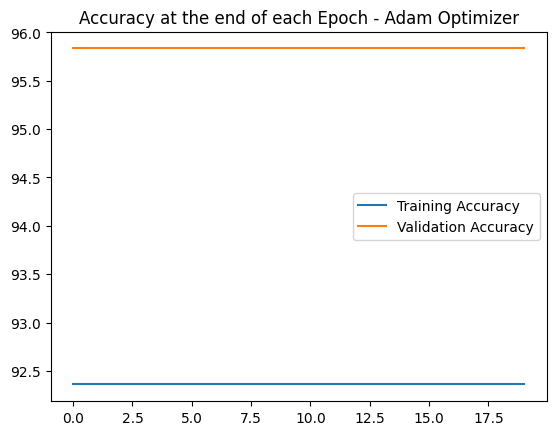

In [36]:
train_correct_cpu_32 = [loss.cpu().detach().numpy() for loss in train_correct_32]
test_correct_cpu_32 = [loss.cpu().detach().numpy() for loss in test_correct_32]

plt.figure(figsize=(10, 10))
plt.plot([t/len(dataset) for t in train_correct_cpu_32],label="Training Accuracy")
plt.plot([t/len(test_dataset) for t in test_correct_cpu_32],label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch - Adam Optimizer")
plt.legend()
plt.savefig("/content/drive/MyDrive/Dataset/Accuracy Batch 32 Adam.png")
plt.show()

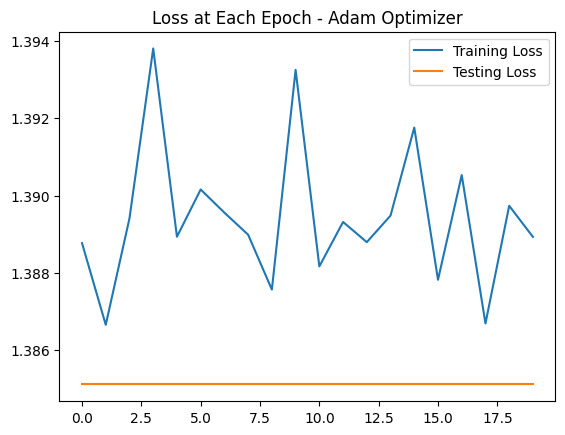

<Figure size 640x480 with 0 Axes>

In [37]:
train_losses_cpu_64 = [loss.cpu().detach().numpy() for loss in train_losses_64]
test_losses_cpu_64 = [loss.cpu().detach().numpy() for loss in test_losses_64]

plt.figure(figsize=(10, 10))
plt.plot(train_losses_cpu_64, label="Training Loss")
plt.plot(test_losses_cpu_64, label="Testing Loss")
plt.title("Loss at Each Epoch - Adam Optimizer")
plt.legend()
plt.savefig("/content/drive/MyDrive/Dataset/Loss Batch 64 Adam.png")
plt.show()

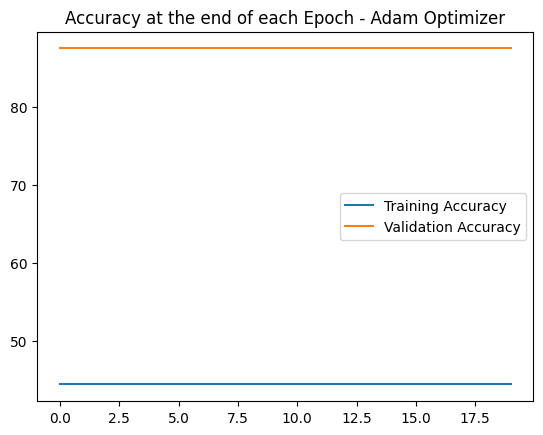

In [38]:
train_correct_cpu_64 = [loss.cpu().detach().numpy() for loss in train_correct_64]
test_correct_cpu_64 = [loss.cpu().detach().numpy() for loss in test_correct_64]

plt.figure(figsize=(10, 10))
plt.plot([t/len(dataset) for t in train_correct_cpu_64],label="Training Accuracy")
plt.plot([t/len(test_dataset) for t in test_correct_cpu_64],label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch - Adam Optimizer")
plt.legend()
plt.savefig("/content/drive/MyDrive/Dataset/Accuracy Batch 64 Adam.png")
plt.show()

In [67]:
## Store the data
Adam_Losses=pd.DataFrame({'Training Loss-1':train_losses_cpu,'Testing Loss-1':test_losses_cpu,
                      'Training Loss-32':train_losses_cpu_32,'Testing Loss-32':test_losses_cpu_32,
                      'Training Loss-64':train_losses_cpu_64,'Testing Loss-64':test_losses_cpu_64})
Adam_Accuaracy=pd.DataFrame({'Training Loss-1':train_correct_cpu,'Testing Loss-1':test_correct_cpu,
                      'Training Loss-32':train_correct_cpu_32,'Testing Loss-32':test_correct_cpu_32,
                      'Training Loss-64':train_correct_cpu_64,'Testing Loss-64':test_correct_cpu_64})

In [ ]:
Adam_Losses.to_csv('/content/drive/MyDrive/Dataset/Adam_Losses.csv')
Adam_Accuaracy.to_csv('/content/drive/MyDrive/Dataset/Adam_Accuaracy.csv')

# **Stochastic Gradient Descent**


## Batch Size = 1

In [39]:
train_dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=2,pin_memory=True)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=2,pin_memory=True)

In [40]:
start_time=time.time()

del model
model=CNN_Model()
model = model.to(device)

epochs=20
train_losses=[]
test_losses=[]
train_correct=[]
test_correct=[]
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# for loop epochs
for i in range(epochs):
  trn_corr=0
  tst_corr=0


# train
  for b,(X_Train,y_train) in enumerate(train_dataloader):
    X_Train, y_train = X_Train.to(device), y_train.to(device)

    y_pred=model(X_Train)
    loss=criterion(y_pred,y_train)

    predicted=torch.max(y_pred.data,1)[1]
    batch_corr=(predicted==y_train).sum()
    trn_corr+=batch_corr
#update parameters

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f"Epoch: {i+1}  Loss:{loss.item()}")
  train_losses.append(loss)
  train_correct.append(trn_corr)

# Test

  with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)
      y_val=model(X_test)
      predicted=torch.max(y_val.data,1)[1]
      tst_corr+=(predicted==y_test).sum()
  loss=criterion(y_val,y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)


current_time=time.time()
total=current_time-start_time
print(f"Total time taken to finish the training ={round(total/60,2)}mins")

Epoch: 1  Loss:0.9210331439971924
Epoch: 2  Loss:0.9925404191017151
Epoch: 3  Loss:1.1699540615081787
Epoch: 4  Loss:1.4225138425827026
Epoch: 5  Loss:1.358869194984436
Epoch: 6  Loss:1.2123966217041016
Epoch: 7  Loss:1.0614780187606812
Epoch: 8  Loss:1.6319873332977295
Epoch: 9  Loss:1.13579523563385
Epoch: 10  Loss:1.5443778038024902
Epoch: 11  Loss:1.4300692081451416
Epoch: 12  Loss:1.065972924232483
Epoch: 13  Loss:2.162205219268799
Epoch: 14  Loss:1.1338081359863281
Epoch: 15  Loss:1.1903187036514282
Epoch: 16  Loss:2.3422417640686035
Epoch: 17  Loss:1.2410235404968262
Epoch: 18  Loss:1.5330246686935425
Epoch: 19  Loss:1.5325086116790771
Epoch: 20  Loss:1.1205302476882935
Total time taken to finish the training =13.35mins


## Batch Size = 32

In [41]:
train_dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=2,pin_memory=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2,pin_memory=True)

In [42]:
start_time=time.time()

del model
model=CNN_Model()
model = model.to(device)

epochs=20
train_losses_32=[]
test_losses_32=[]
train_correct_32=[]
test_correct_32=[]
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# for loop epochs
for i in range(epochs):
  trn_corr=0
  tst_corr=0


# train
  for b,(X_Train,y_train) in enumerate(train_dataloader):
    X_Train, y_train = X_Train.to(device), y_train.to(device)

    y_pred=model(X_Train)
    loss=criterion(y_pred,y_train)

    predicted=torch.max(y_pred.data,1)[1]
    batch_corr=(predicted==y_train).sum()
    trn_corr+=batch_corr
#update parameters

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f"Epoch: {i+1}  Loss:{loss.item()}")
  train_losses_32.append(loss)
  train_correct_32.append(trn_corr)

# Test

  with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)
      y_val=model(X_test)
      predicted=torch.max(y_val.data,1)[1]
      tst_corr+=(predicted==y_test).sum()
  loss=criterion(y_val,y_test)
  test_losses_32.append(loss)
  test_correct_32.append(tst_corr)


current_time=time.time()
total=current_time-start_time
print(f"Total time taken to finish the training ={round(total/60,2)}mins")

Epoch: 1  Loss:1.3490173816680908
Epoch: 2  Loss:1.387053370475769
Epoch: 3  Loss:1.4133237600326538
Epoch: 4  Loss:1.3433375358581543
Epoch: 5  Loss:1.2329163551330566
Epoch: 6  Loss:1.180653691291809
Epoch: 7  Loss:0.7693832516670227
Epoch: 8  Loss:1.3546913862228394
Epoch: 9  Loss:1.23286771774292
Epoch: 10  Loss:0.7374721765518188
Epoch: 11  Loss:0.401704341173172
Epoch: 12  Loss:0.5395662784576416
Epoch: 13  Loss:0.3408411145210266
Epoch: 14  Loss:0.6745660305023193
Epoch: 15  Loss:0.43312355875968933
Epoch: 16  Loss:0.3955322504043579
Epoch: 17  Loss:0.6218262314796448
Epoch: 18  Loss:0.2799566388130188
Epoch: 19  Loss:0.024860071018338203
Epoch: 20  Loss:0.1523975133895874
Total time taken to finish the training =6.81mins


## Batch Size = 64

In [43]:
train_dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=2,pin_memory=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2,pin_memory=True)

In [44]:
start_time=time.time()

del model
model=CNN_Model()
model = model.to(device)

epochs=20
train_losses_64=[]
test_losses_64=[]
train_correct_64=[]
test_correct_64=[]
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# for loop epochs
for i in range(epochs):
  trn_corr=0
  tst_corr=0


# train
  for b,(X_Train,y_train) in enumerate(train_dataloader):
    X_Train, y_train = X_Train.to(device), y_train.to(device)

    y_pred=model(X_Train)
    loss=criterion(y_pred,y_train)

    predicted=torch.max(y_pred.data,1)[1]
    batch_corr=(predicted==y_train).sum()
    trn_corr+=batch_corr
#update parameters

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f"Epoch: {i+1}  Loss:{loss.item()}")
  train_losses_64.append(loss)
  train_correct_64.append(trn_corr)

# Test

  with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)
      y_val=model(X_test)
      predicted=torch.max(y_val.data,1)[1]
      tst_corr+=(predicted==y_test).sum()
  loss=criterion(y_val,y_test)
  test_losses_64.append(loss)
  test_correct_64.append(tst_corr)


current_time=time.time()
total=current_time-start_time
print(f"Total time taken to finish the training ={round(total/60,2)}mins")

Epoch: 1  Loss:1.344687819480896
Epoch: 2  Loss:1.3822394609451294
Epoch: 3  Loss:1.3499788045883179
Epoch: 4  Loss:1.3805617094039917
Epoch: 5  Loss:1.4091334342956543
Epoch: 6  Loss:1.3008538484573364
Epoch: 7  Loss:1.1711456775665283
Epoch: 8  Loss:0.9313477873802185
Epoch: 9  Loss:1.0826561450958252
Epoch: 10  Loss:0.681581437587738
Epoch: 11  Loss:0.3553640842437744
Epoch: 12  Loss:0.6005293726921082
Epoch: 13  Loss:0.48459404706954956
Epoch: 14  Loss:0.34895169734954834
Epoch: 15  Loss:0.5291088819503784
Epoch: 16  Loss:0.3338858485221863
Epoch: 17  Loss:0.558243989944458
Epoch: 18  Loss:0.14535504579544067
Epoch: 19  Loss:0.07911283522844315
Epoch: 20  Loss:0.11446449905633926
Total time taken to finish the training =7.05mins


# Visualization

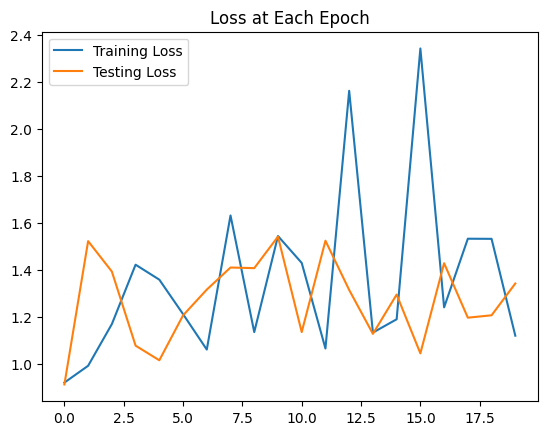

<Figure size 640x480 with 0 Axes>

In [45]:
train_losses_cpu = [loss.cpu().detach().numpy() for loss in train_losses]
test_losses_cpu = [loss.cpu().detach().numpy() for loss in test_losses]

plt.figure(figsize=(10, 10))
plt.plot(train_losses_cpu, label="Training Loss")
plt.plot(test_losses_cpu, label="Testing Loss")
plt.title("Loss at Each Epoch")
plt.legend()
plt.savefig("/content/drive/MyDrive/Dataset/Loss Batch 1 SGD.png")
plt.show()

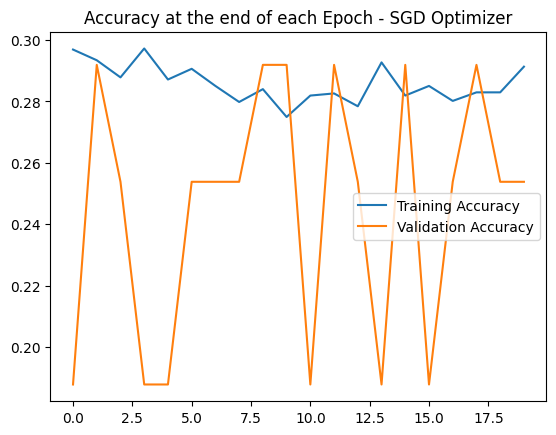

In [56]:
train_correct_cpu = [loss.cpu().detach().numpy() for loss in train_correct]
test_correct_cpu = [loss.cpu().detach().numpy() for loss in test_correct]

plt.figure(figsize=(10, 10))
plt.plot([t/len(dataset) for t in train_correct_cpu],label="Training Accuracy")
plt.plot([t/len(test_dataset) for t in test_correct_cpu],label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch - SGD Optimizer")
plt.legend()
plt.savefig("/content/drive/MyDrive/Dataset/Accuracy Batch 1 SGD.png")
plt.show()

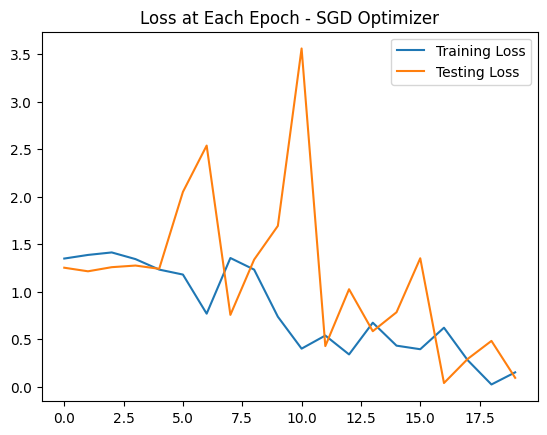

<Figure size 640x480 with 0 Axes>

In [47]:
train_losses_cpu_32 = [loss.cpu().detach().numpy() for loss in train_losses_32]
test_losses_cpu_32 = [loss.cpu().detach().numpy() for loss in test_losses_32]

plt.figure(figsize=(10, 10))
plt.plot(train_losses_cpu_32, label="Training Loss")
plt.plot(test_losses_cpu_32, label="Testing Loss")
plt.title("Loss at Each Epoch - SGD Optimizer")
plt.legend()
plt.savefig("/content/drive/MyDrive/Dataset/Loss Batch 32 SGD.png")
plt.show()

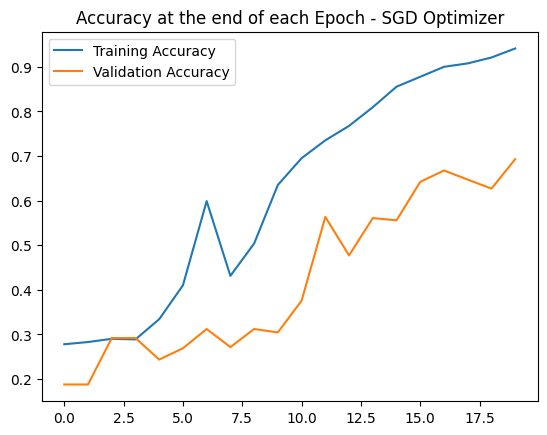

In [55]:
train_correct_cpu_32 = [loss.cpu().detach().numpy() for loss in train_correct_32]
test_correct_cpu_32 = [loss.cpu().detach().numpy() for loss in test_correct_32]

plt.figure(figsize=(10, 10))
plt.plot([t/len(dataset) for t in train_correct_cpu_32],label="Training Accuracy")
plt.plot([t/len(test_dataset) for t in test_correct_cpu_32],label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch - SGD Optimizer")
plt.legend()
plt.savefig("/content/drive/MyDrive/Dataset/Accuracy Batch 32 SGD.png")
plt.show()

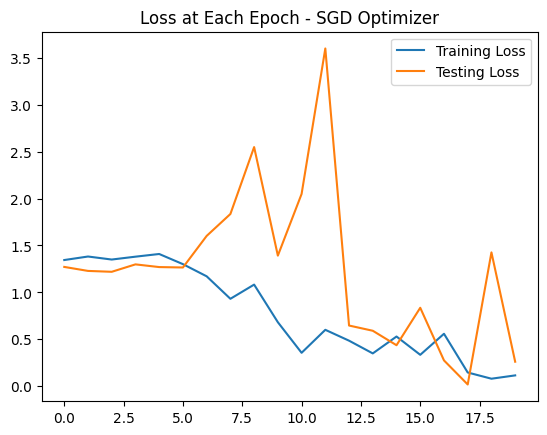

<Figure size 640x480 with 0 Axes>

In [49]:
train_losses_cpu_64 = [loss.cpu().detach().numpy() for loss in train_losses_64]
test_losses_cpu_64 = [loss.cpu().detach().numpy() for loss in test_losses_64]

plt.figure(figsize=(10, 10))
plt.plot(train_losses_cpu_64, label="Training Loss")
plt.plot(test_losses_cpu_64, label="Testing Loss")
plt.title("Loss at Each Epoch - SGD Optimizer")
plt.legend()
plt.savefig("/content/drive/MyDrive/Dataset/Loss Batch 64 SGD.png")
plt.show()

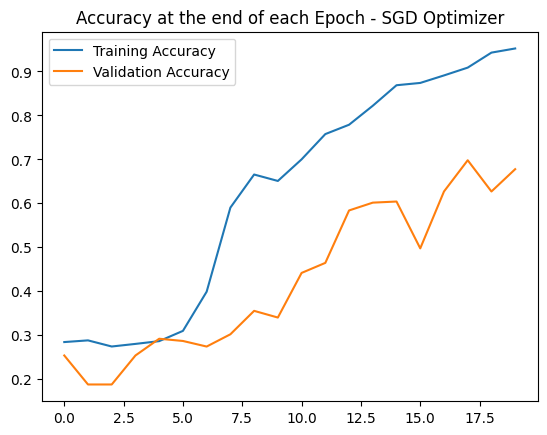

In [54]:
train_correct_cpu_64 = [loss.cpu().detach().numpy() for loss in train_correct_64]
test_correct_cpu_64 = [loss.cpu().detach().numpy() for loss in test_correct_64]

plt.figure(figsize=(10, 10))
plt.plot([t/len(dataset) for t in train_correct_cpu_64],label="Training Accuracy")
plt.plot([t/len(test_dataset) for t in test_correct_cpu_64],label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch - SGD Optimizer")
plt.legend()
plt.savefig("/content/drive/MyDrive/Dataset/Accuracy Batch 64 SGD.png")
plt.show()

## Storing the values


In [62]:
## Store the data
SGD_Losses=pd.DataFrame({'Training Loss-1':train_losses_cpu,'Testing Loss-1':test_losses_cpu,
                      'Training Loss-32':train_losses_cpu_32,'Testing Loss-32':test_losses_cpu_32,
                      'Training Loss-64':train_losses_cpu_64,'Testing Loss-64':test_losses_cpu_64})
SGD_Accuaracy=pd.DataFrame({'Training Loss-1':train_correct_cpu,'Testing Loss-1':test_correct_cpu,
                      'Training Loss-32':train_correct_cpu_32,'Testing Loss-32':test_correct_cpu_32,
                      'Training Loss-64':train_correct_cpu_64,'Testing Loss-64':test_correct_cpu_64})

In [ ]:
SGD_Losses.to_csv('/content/drive/MyDrive/Dataset/SGD_Losses.csv')
SGD_Accuaracy.to_csv('/content/drive/MyDrive/Dataset/SGD_Accuaracy.csv')

In [ ]:
from google.colab import runtime
runtime.unassign()